In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter



In [ ]:
rcParams['figure.figsize']= 7, 6
sb.set_style('whitegrid')

# read in our data. Using enrollement.forecast.csv


In [ ]:
# read in our data. Using enrollement.forecast.csv

address = "https://raw.githubusercontent.com/jnunez03/Pandas_forDataAnalysis/master/enrollment_forecast.csv"
enroll = pd.read_csv(address)

In [ ]:

enroll.columns = ['year','roll','unem','hgrad','inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


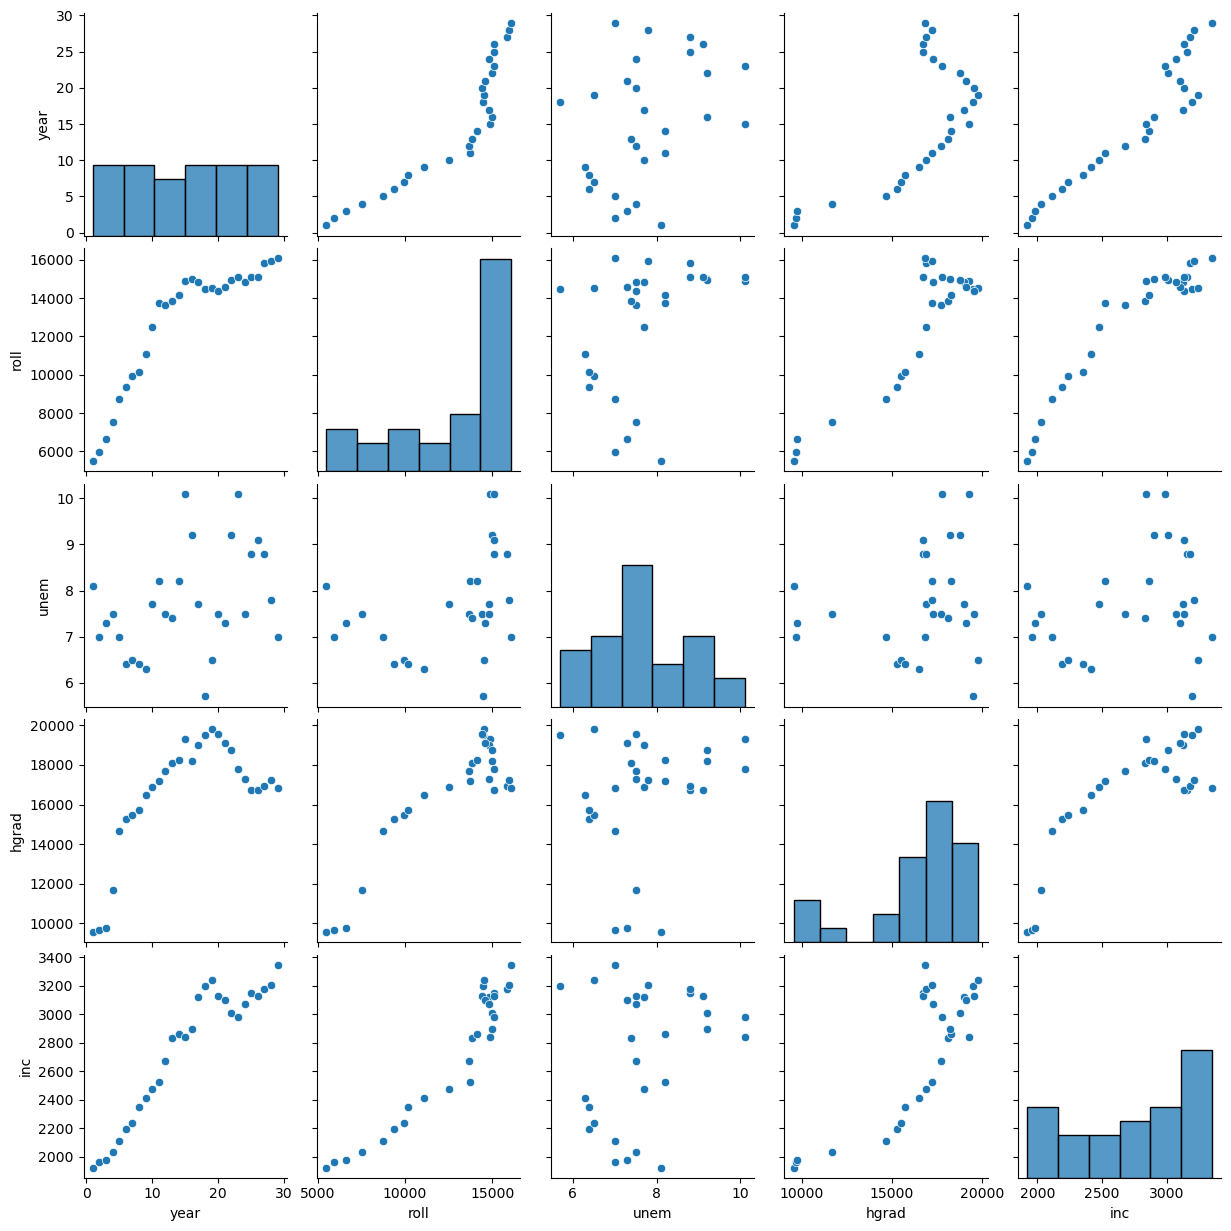

In [ ]:

sb.pairplot(enroll) # some are strong, and they are all continous numeric.

In [ ]:
# check correlation. We don't want correlation between our predictor variables here.
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [ ]:
enroll_data = enroll[["unem","hgrad"]].values
enroll_target = enroll[["roll"]].values  # column retrieval.

enroll_data_names = ['unem','hgrad'] # column names for new dataframe.

In [ ]:
# we need to scale our variables.
X, y = scale(enroll_data), enroll_target


In [ ]:
X

array([[ 0.34682081, -2.42562243],
       [-0.64989846, -2.38111647],
       [-0.37806593, -2.36338363],
       [-0.19684425, -1.69057879],
       [-0.64989846, -0.64434118],
       [-1.19356352, -0.43919655],
       [-1.10295268, -0.36304964],
       [-1.19356352, -0.27994868],
       [-1.28417436, -0.00943593],
       [-0.01562256,  0.12582044],
       [ 0.43743166,  0.23465141],
       [-0.19684425,  0.4098936 ],
       [-0.28745509,  0.5493224 ],
       [ 0.43743166,  0.60425944],
       [ 2.15903768,  0.96656572],
       [ 1.34354009,  0.58965593],
       [-0.01562256,  0.85843016],
       [-1.82783942,  1.03506316],
       [-1.10295268,  1.13763548],
       [-0.19684425,  1.04931898],
       [-0.37806593,  0.90015449],
       [ 1.34354009,  0.78089244],
       [ 2.15903768,  0.44675009],
       [-0.19684425,  0.26976938],
       [ 0.98109672,  0.07922827],
       [ 1.25292925,  0.07679435],
       [ 0.98109672,  0.13799004],
       [ 0.07498828,  0.24438708],
       [-0.64989846,

In [ ]:
y

array([[ 5501],
       [ 5945],
       [ 6629],
       [ 7556],
       [ 8716],
       [ 9369],
       [ 9920],
       [10167],
       [11084],
       [12504],
       [13746],
       [13656],
       [13850],
       [14145],
       [14888],
       [14991],
       [14836],
       [14478],
       [14539],
       [14395],
       [14599],
       [14969],
       [15107],
       [14831],
       [15081],
       [15127],
       [15856],
       [15938],
       [16081]])

In [ ]:
# check for missing values.
# bool returns
missing_values = X==np.NAN
X[missing_values == True] # returns rows with missing values

array([], dtype=float64)

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X,y)

LinearRegression()

In [ ]:
print(LinReg.score(X,y)) # 84.89 prediction accuracy.

0.8488812666133723
